Weighted Pre-Treatment Speed: 18.05 mph
Weighted Post-Treatment Speed: 15.03 mph
T-Statistic: 12.330, P-Value: 0.000


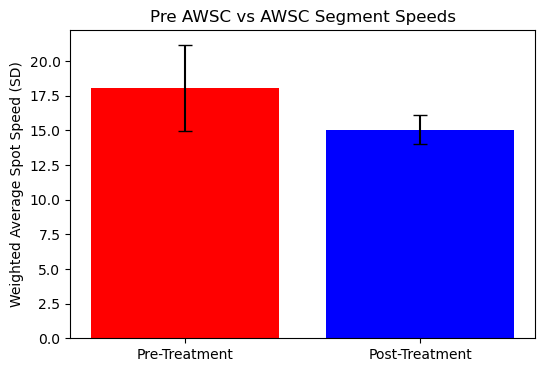

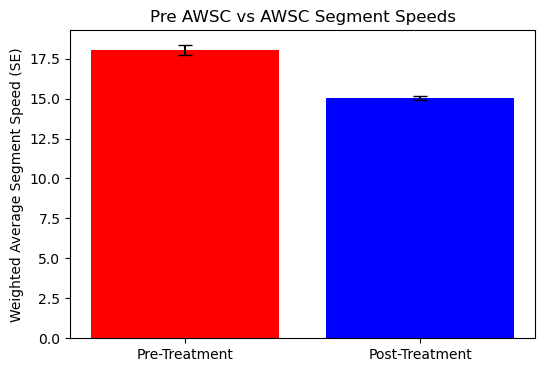

       pre_speeds  post_speeds
count   99.000000   105.000000
mean    20.303030    15.409524
std      3.949824     1.174204
min     14.000000    13.000000
25%     17.000000    15.000000
50%     19.000000    15.000000
75%     23.000000    16.000000
max     31.000000    18.000000


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/pre_seg.csv')
post_treatment = pd.read_csv('data/post_seg.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)



In [3]:
pre_treatment.head()

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
7,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,1: Monday (M-M),...,22.0,6.0,23.768,0.928,5.82,0.02,17.0,19.0,23.0,30.0
8,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,1: Monday (M-M),...,16.0,7.0,23.768,0.694,18.91,0.35,4.0,8.0,22.0,28.0
9,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,1: Monday (M-M),...,15.0,8.0,23.768,0.649,23.22,0.53,4.0,7.0,21.0,23.0
10,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,1: Monday (M-M),...,17.0,7.0,23.768,0.709,17.74,0.31,5.0,9.0,22.0,31.0
11,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,1: Monday (M-M),...,17.0,7.0,23.768,0.727,7.47,0.12,11.0,12.0,22.0,29.0


In [4]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

Weighted Pre-Treatment 85th Speed Percentile: 20.24 mph
Weighted Post-Treatment 85th Speed Percentile: 18.99 mph
Weighted Pre-Treatment 95th Speed Percentile: 25.36 mph
Weighted Post-Treatment 95th Speed Percentile: 26.12 mph
Highest value for pre-treatment'85th Speed Percentile': 50.0 mph Highest value for post-treatment'85th Speed Percentile': 42.0 mph
Data Periods                                             Jan 01, 2019 - Mar 31, 2019
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                                                   St Louis
Line Zone Length (Miles)                                                       0.034
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         208
Zone is Bi-Direction                            

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
141,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,7: Sunday (Su-Su),...,25.0,5.0,39.457,0.633,2.11,0.03,6.0,6.0,48.0,57.0
143,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,7: Sunday (Su-Su),...,27.0,5.0,39.457,0.686,1.63,0.02,7.0,13.0,48.0,67.0
87,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-02,6: Saturday (Sa-Sa),...,26.0,5.0,48.156,0.547,3.64,0.06,7.0,8.0,48.0,50.0
93,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-02,7: Sunday (Su-Su),...,29.0,4.0,48.156,0.593,3.07,0.04,5.0,21.0,47.0,71.0
135,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,6: Saturday (Sa-Sa),...,26.0,5.0,39.457,0.669,2.08,0.03,8.0,10.0,47.0,65.0
123,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,4: Thursday (Th-Th),...,25.0,5.0,39.457,0.623,4.76,0.07,3.0,6.0,42.0,45.0
128,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,5: Friday (F-F),...,23.0,5.0,39.457,0.589,4.83,0.09,11.0,12.0,41.0,47.0
44,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-01,7: Sunday (Su-Su),...,20.0,6.0,23.768,0.835,3.06,0.03,12.0,15.0,41.0,52.0
131,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,5: Friday (F-F),...,27.0,4.0,39.457,0.695,3.54,0.04,7.0,9.0,41.0,50.0
111,"Jan 01, 2019 - Mar 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,St Louis,0.034,yes,208,yes,2019-03,2: Tuesday (Tu-Tu),...,26.0,5.0,39.457,0.648,4.70,0.06,10.0,14.0,41.0,43.0


In [5]:
pre_volume = pre_treatment["Vehicle Miles of Travel (StL Volume)"]
post_volume = post_treatment["Vehicle Miles of Travel (StL Volume)"]

# Calculate weighted 85th and 95th percentile speeds
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_85th_speed, post_weighted_85th_speed, pre_weighted_95th_speed, post_weighted_95th_speed

(np.float64(20.23639279443684),
 np.float64(18.994463593278763),
 np.float64(25.358259715482557),
 np.float64(26.122655464598598))